In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [4]:
df.shape

(5572, 5)

## 1).Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], inplace = True)
df.sample(5)

,v1,v2
2479,spam,Sppok up ur mob with a Halloween collection of...
721,ham,S'fine. Anytime. All the best with it.
4071,spam,Loans for any purpose even if you have Bad Cre...
713,ham,Save yourself the stress. If the person has a ...
2802,spam,FreeMsg>FAV XMAS TONES!Reply REAL


In [7]:
df.rename(columns ={'v1': "target", "v2":'text'}, inplace = True)
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df.target  = pd.get_dummies(df.target, drop_first = True)

In [9]:
df.sample(5)

,target,text
501,0,When can Ì_ come out?
2802,1,FreeMsg>FAV XMAS TONES!Reply REAL
4180,0,"Ok da, i already planned. I wil pick you."
3472,0,You getting back any time soon?
1191,0,Come to my home for one last time i wont do an...


In [10]:
#Check for missing value
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
#check for duplicate values
df.duplicated().sum()

403

In [12]:
df = df.drop_duplicates(keep = "first")
df.sample(5)

,target,text
4570,0,\CHA QUITEAMUZING THATåÕSCOOL BABE
5063,0,I dunno lei... Like dun haf...
642,0,Probably gonna swing by in a wee bit
496,0,Nope... Think i will go for it on monday... So...
4247,1,"accordingly. I repeat, just text the word ok o..."


In [13]:
df.shape

(5169, 2)

# 2 EDA

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.target.value_counts()

0    4516
1     653
Name: target, dtype: int64

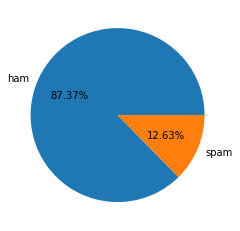

In [16]:
import matplotlib.pyplot as plt
plt.pie(df.target.value_counts(), labels = ["ham", 'spam'], autopct = "%0.2f%%")
plt.show()

In [17]:
#Data is imbalance

In [18]:
!pip install nltk

In [19]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/sourav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
df['num_characters'] = df.text.apply(len)

/tmp/ipykernel_81594/1031772955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df.text.apply(len)


In [21]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
#Num Words
df['num_words'] = df.text.apply(lambda x: len(nltk.word_tokenize(x)))

/tmp/ipykernel_81594/3741923371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df.text.apply(lambda x: len(nltk.word_tokenize(x)))


In [23]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
df['num_sentences'] = df.text.apply(lambda x: len(nltk.sent_tokenize(x)))

/tmp/ipykernel_81594/1197648308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df.text.apply(lambda x: len(nltk.sent_tokenize(x)))


In [25]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df[["num_characters", "num_words",'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
#ham message
df[df.target == 0][["num_characters", "num_words",'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
#spam message
df[df.target == 1][["num_characters", "num_words",'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [29]:
# len of spam message is more than ham message on an average


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

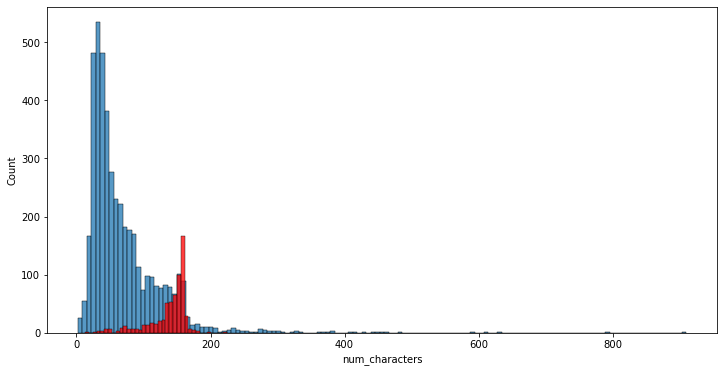

In [30]:
import seaborn as sns
plt.figure(figsize = (12,6))
sns.histplot(df[df.target ==0]['num_characters'])
sns.histplot(df[df.target ==1]['num_characters'], color = 'red')


<AxesSubplot:xlabel='num_words', ylabel='Count'>

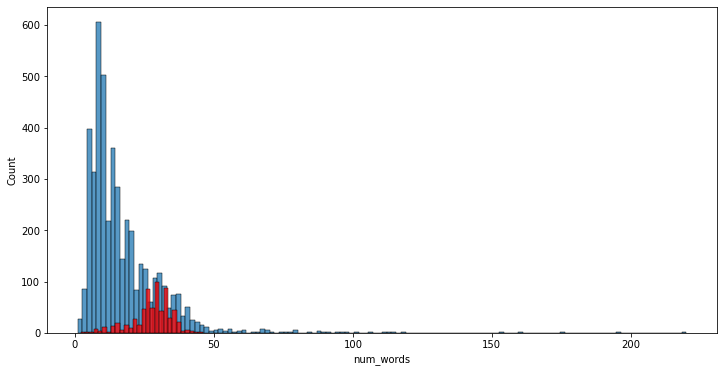

In [31]:
import seaborn as sns
plt.figure(figsize = (12,6))
sns.histplot(df[df.target ==0]['num_words'])
sns.histplot(df[df.target ==1]['num_words'], color = 'red')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

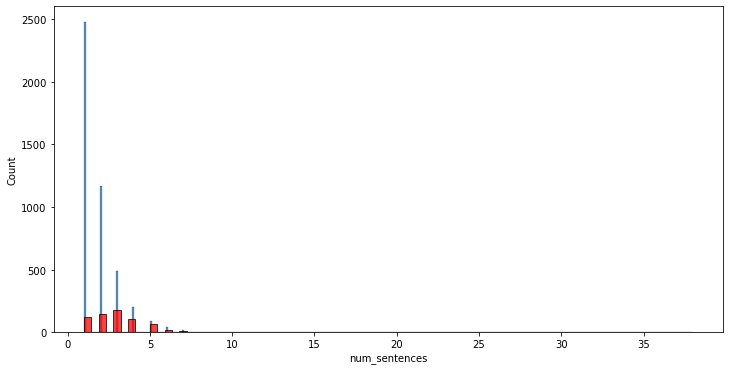

In [32]:
import seaborn as sns
plt.figure(figsize = (12,6))
sns.histplot(df[df.target ==0]['num_sentences'])
sns.histplot(df[df.target ==1]['num_sentences'], color = 'red')

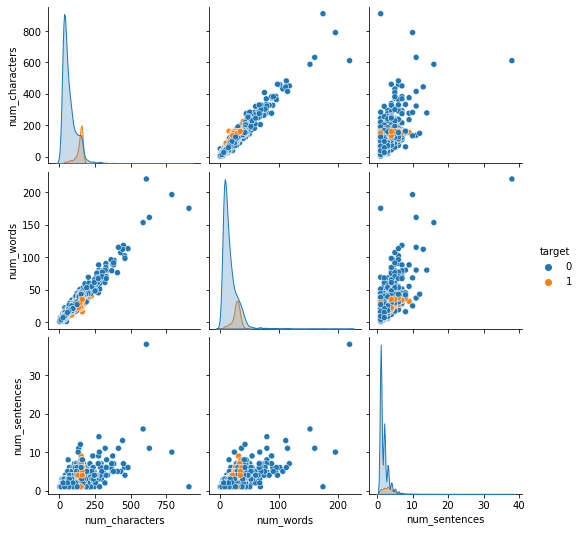

In [33]:
sns.pairplot(df, hue = "target")

<AxesSubplot:>

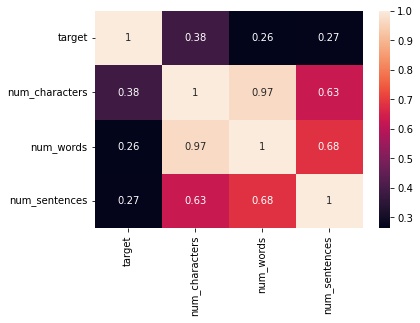

In [34]:
sns.heatmap(df.corr(),annot = True)

# 3 ) Data Preprocessing

Lower case<br>
Tokenization<br>
Removing the special charecters<br>
Removing the stopwords and puctuation<br>
Steming

In [35]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [36]:
nltk.download("stopwords")
from nltk.corpus import stopwords
 

[nltk_data] Downloading package stopwords to /home/sourav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
import string
from string import punctuation

In [38]:
print(len(stopwords.words('english')))

179


In [39]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)
    
            

In [40]:
ps.stem("able")

'abl'

In [41]:
df.text[11]

'SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info'

In [42]:
transform_text(df.text[11])

'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info'

In [43]:
df.text[10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [44]:
transform_text(df.text[10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [45]:
df['transform_text'] = df.text.apply(transform_text)

/tmp/ipykernel_81594/1874415109.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transform_text'] = df.text.apply(transform_text)


In [46]:
df.sample(5)

,target,text,num_characters,num_words,num_sentences,transform_text
4592,0,It's ok i wun b angry. Msg u aft i come home t...,53,16,2,ok wun b angri msg u aft come home tonight
3904,1,Do you want a new video handset? 750 anytime a...,145,28,5,want new video handset 750 anytim network min ...
2719,0,Go where n buy? Juz buy when we get there lar.,46,13,2,go n buy juz buy get lar
486,1,FREE MESSAGE Activate your 500 FREE Text Messa...,146,24,1,free messag activ 500 free text messag repli m...
305,0,Yup... From what i remb... I think should be c...,57,14,2,yup remb think book


In [47]:
from wordcloud import WordCloud


In [48]:
!pip install wordcloud

In [49]:
wc = WordCloud(height = 500, width = 500,min_font_size=10, background_color = 'white')

In [50]:
spam_wc =wc.generate(df[df.target==1]["transform_text"].str.cat(sep=" "))

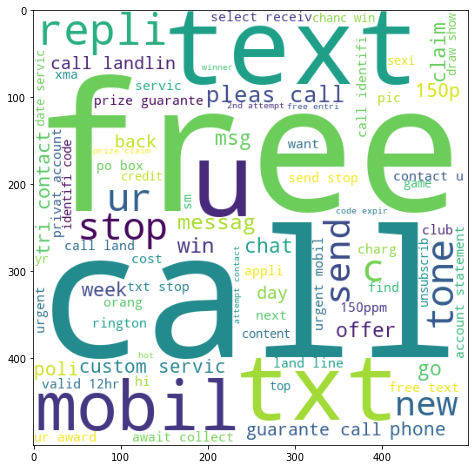

In [51]:
plt.figure(figsize = (12,8))
plt.imshow(spam_wc)

In [52]:
ham_wc = wc.generate(df[df.target==0]["transform_text"].str.cat(sep=" "))

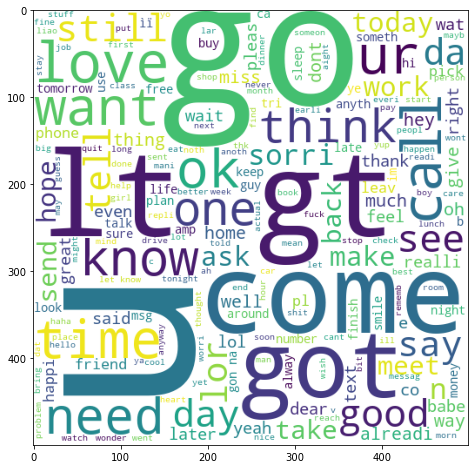

In [53]:
plt.figure(figsize = (12,8))
plt.imshow(ham_wc)

In [54]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [55]:
spam_corpus = []
for msg in df[df.target==1]["transform_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [56]:
len(spam_corpus)

9939

In [57]:
from collections import Counter
spam_word_count = pd.DataFrame(Counter(spam_corpus).most_common(50))
spam_word_count

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


/home/sourav/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


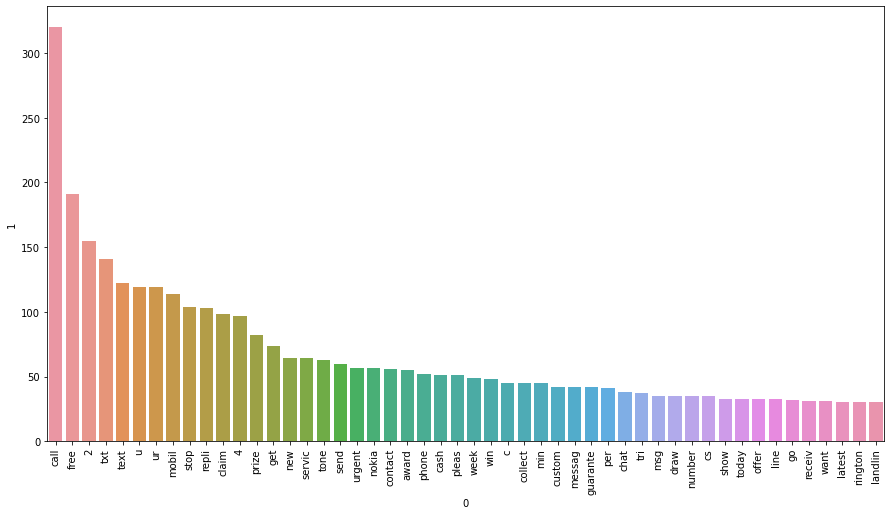

In [58]:
plt.figure(figsize = (15,8))
sns.barplot(spam_word_count[0], spam_word_count[1])
plt.xticks(rotation  = "vertical")
plt.show()

In [59]:
ham_corpus  = []

for msg in df[df.target==0]["transform_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [60]:
print(ham_corpus)

['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat', 'ok', 'lar', 'joke', 'wif', 'u', 'oni', 'u', 'dun', 'say', 'earli', 'hor', 'u', 'c', 'alreadi', 'say', 'nah', 'think', 'goe', 'usf', 'live', 'around', 'though', 'even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent', 'per', 'request', 'mell', 'oru', 'minnaminungint', 'nurungu', 'vettam', 'set', 'callertun', 'caller', 'press', '9', 'copi', 'friend', 'callertun', 'gon', 'na', 'home', 'soon', 'want', 'talk', 'stuff', 'anymor', 'tonight', 'k', 'cri', 'enough', 'today', 'search', 'right', 'word', 'thank', 'breather', 'promis', 'wont', 'take', 'help', 'grant', 'fulfil', 'promis', 'wonder', 'bless', 'time', 'date', 'sunday', 'oh', 'k', 'watch', 'eh', 'u', 'rememb', '2', 'spell', 'name', 'ye', 'v', 'naughti', 'make', 'v', 'wet', 'fine', 'thatåõ', 'way', 'u', 'feel', 'thatåõ', 'way', 'gota', 'b', 'serious', 'spell', 'name', 'go', 'tri', '2', 'month', 'ha', 

In [61]:
ham_word_count = pd.DataFrame(Counter(ham_corpus).most_common(50))
ham_word_count

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


/home/sourav/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


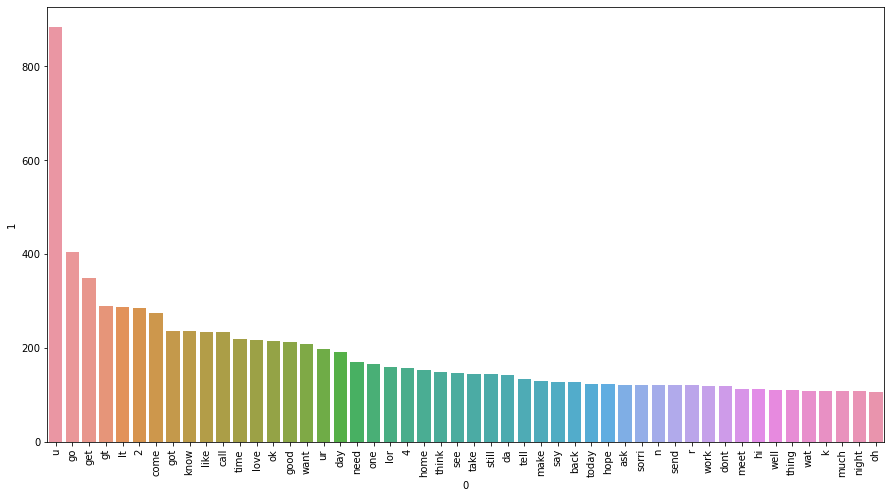

In [62]:
plt.figure(figsize = (15,8))
sns.barplot(ham_word_count[0], ham_word_count[1])
plt.xticks(rotation = "vertical")
plt.show()

In [63]:
#Text Vectorization
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4.Model Building

In [64]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [65]:
tfidf = TfidfVectorizer(max_features=3000)

In [67]:
X = tfidf.fit_transform(df.transform_text).toarray()

In [68]:
X.shape

(5169, 3000)

In [69]:
y = df.target.values

In [70]:
y.shape

(5169,)

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [72]:
X_train.shape

(4135, 3000)

In [73]:
y_train.shape

(4135,)

In [74]:
#As we don't know the distribution of the data we try all three slgorithm of naive bayes
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [75]:
y_pred1 = gnb.fit(X_train, y_train).predict(X_test)

In [76]:
y_pred1

array([0, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [77]:
y_pred2 = mnb.fit(X_train, y_train).predict(X_test)
y_pred2

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [78]:
y_pred3 = bnb.fit(X_train, y_train).predict(X_test)
y_pred3

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [79]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

In [80]:
precision = [precision_score(y_test, y_pred1),precision_score(y_test, y_pred2),precision_score(y_test, y_pred3)]
precision

[0.5068493150684932, 1.0, 0.991869918699187]

In [81]:
accuracy = [accuracy_score(y_test, y_pred1),accuracy_score(y_test, y_pred2),accuracy_score(y_test, y_pred3)]
accuracy

[0.8694390715667312, 0.9709864603481625, 0.9835589941972921]

In [82]:
performance_report = pd.DataFrame({"Accuracy Score": accuracy, "Precision Score": precision}, index = ["GaussianNB", "MultinomialNB", "BernoulliNB"])

In [83]:
performance_report

,Accuracy Score,Precision Score
GaussianNB,0.869439,0.506849
MultinomialNB,0.970986,1.000000
BernoulliNB,0.983559,0.991870


We Can see MultinomialNB gives us best precision and as it is an imbalace dataset we give more priority on precision score

In [84]:
import pickle
pickle.dump(tfidf, open("vectorizer.pkl",'wb'))
pickle.dump(mnb, open("model.pkl", 'wb'))

In [88]:
df[df.target ==1]

,target,text,num_characters,num_words,num_sentences,transform_text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3,six chanc win cash 100 pound txt csh11 send co...
...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3,want explicit sex 30 sec ring 02073162414 cost...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,6,ask 3mobil 0870 chatlin inclu free min india c...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5,contract mobil 11 mnth latest motorola nokia e...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1,remind o2 get pound free call credit detail gr...
